# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [345]:
import numpy as np
import pandas as pd

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [346]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

print(A @ e_1)
print(A @ e_2)
print(A @ e_3)

[1 4 7]
[2 5 8]
[3 6 9]


Multiplying A by each of the following vectors returns the corresponding column of the matrix A as a row. This happens because the rules of matrix multiplication state that the elements of the row result in the dot product of the column of A with the row of the vector. Since there is only a 1 with 2 other zeroes, the result if the column of A based on the positioning of the non-zero element. 

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [347]:
u = np.ones(3)

In [348]:
# print(u)
print (A @ u)

[ 6. 15. 24.]


Instead of zeroes this time, each element of the row in the resulting matrix comes from the dot product of each row with each element of u, in this case all 1's. As a result, the answer we get ends up being the sum of each row of A as we take the solution from part A, and essentially sum up the columns of the 3 print statements from part A as the elements of the row in u. 

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [349]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [350]:
print (A @ x)

[-2  4 11]


Like in the name, the identity matrix A, multiplied by any other vector or matrix will literally give you the "identity" or same vector that you multiplied it by. Each element in x is matched by a singular corresponding 1 in the A matrix, that when multiplied, results in the original vector. This means that any vector multiplied by the identity matrix will result in the same vector.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [351]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


In [352]:
print(A @ x)

[11 -2  4]


The result of a matrix where the columns and rows add up to 1 but not the diagnal returns the same results as the identity matrix, where all elements of the matrix are the same as from the input, but simply in a rearranged form. The result of the output depends on the position of the 1 in the A matrix, which will determine when its corresponding element from x will be printed out in order. 

In [353]:
A = np.array([ [0,1,0],
              [1,0,0],
              [0,0,1]])
x = np.array([-2,4,11])

print (A @ x)

[ 4 -2 11]


Similarly here, shifting around the values of 1 in matrix A reveals how the positioning of the A by swapping columns 2 and 3 result in a new permutation of the matrix where 4 and 11, the corresponding elements of X are now switched. 

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [354]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [355]:
print (A @ e_1)
print (A @ e_2)
print (A @ e_3)

[0.50052958 0.02574731 0.47372311]
[0.24049286 0.39251588 0.36699127]
[0.18358131 0.37907577 0.43734292]


The result of the matrix A multiplied by the vectors e_1, e_2, and e_3 shows the probability of each state, specifically from left to right in each column state 1, 2 and 3. Given each step in the state, moving across each element of the row in the matrix gives you a probaility from one state to the next. 

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [356]:
x = e_1.copy()
for i in range(5): 
    x = A @ x

print(x)

[0.29266551 0.27862515 0.42870935]


In [357]:
x = e_2.copy()
for i in range(5): 
    x = A @ x

print(x)

[0.29197422 0.27979983 0.42822595]


In [358]:
x = e_3.copy()
for i in range(5): 
    x = A @ x

print(x)

[0.29171646 0.2802254  0.42805814]


After several iterations of multiplication, you will see the vectors start to converge to a singular value, representing the problability of the Markov chain and distribution regardless of the starting state. 

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [359]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [360]:
state1 = np.array([1.0, 0.0]) 

result = T @ state1
print(result)

[0.25 0.75]


The above result represents the new probability of the distribution after one iteration to the state. Starting from State 1, the probability of state 1 is 0.25 and the probability of state 2 is 0.75.

In [361]:
result = T @ result
print(result)

[0.4375 0.5625]


The next result above is not a column of T beacuse it represents the second iteration from the start, and the resulting probability distribution after two cycles essentially. 

In [ ]:
t = np.array([1.0,0.0])

for i in range(10):
    print(i, t)
    t = T @ t


0 [1. 0.]
1 [0.25 0.75]
2 [0.4375 0.5625]
3 [0.390625 0.609375]
4 [0.40234375 0.59765625]
5 [0.39941406 0.60058594]
6 [0.40014648 0.59985352]
7 [0.39996338 0.60003662]
8 [0.40000916 0.59999084]
9 [0.39999771 0.60000229]


The chain starts to stabilize around 5-6 iterations. 

In [ ]:
t = np.array([0, 1])

for i in range(10):
    print(i, t)
    t = T @ t


0 [0 1]
1 [0.5 0.5]
2 [0.375 0.625]
3 [0.40625 0.59375]
4 [0.3984375 0.6015625]
5 [0.40039062 0.59960938]
6 [0.39990234 0.60009766]
7 [0.40002441 0.59997559]
8 [0.3999939 0.6000061]
9 [0.40000153 0.59999847]


Similarly, the chain starts to stabilize around 5-6 iterations agian. As a result, the initial condition did not have any effect. 

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [364]:
weather = pd.read_csv("cville_weather.csv")
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          411 non-null    object 
 1   NAME             411 non-null    object 
 2   DATE             411 non-null    object 
 3   DAPR             12 non-null     float64
 4   DAPR_ATTRIBUTES  12 non-null     object 
 5   MDPR             12 non-null     float64
 6   MDPR_ATTRIBUTES  12 non-null     object 
 7   PRCP             399 non-null    float64
 8   PRCP_ATTRIBUTES  399 non-null    object 
 9   SNOW             223 non-null    float64
 10  SNOW_ATTRIBUTES  223 non-null    object 
 11  SNWD             1 non-null      float64
 12  SNWD_ATTRIBUTES  1 non-null      object 
dtypes: float64(5), object(8)
memory usage: 41.9+ KB


,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In [365]:
weather.isna().sum()

STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64

There seem to be some missing values, with only a few for values like PRCP. 

In [ ]:
weather['rain'] = np.where(weather["PRCP"] > 0, 1, 0)
weather[['PRCP', 'rain']].head()

transition = np.zeros((2, 2))  # rows = next state, cols = current state
rain = weather["rain"].values

states = [0, 1]  # 0 = clear 1 = rain
S = len(states)
T = len(rain)

tr_counts = np.zeros( (S, S) )

for t in range(1,T): # For each transition
    # Current and next tokens:
    x_tm1 = rain[t-1] # previous state
    x_t = rain[t] # current state

    # Update transition counts:
    tr_counts[x_t, x_tm1] += 1

# Sum the transition counts by row:
sums = tr_counts.sum(axis = 0, keepdims=True)
print(f'\nState Counts: \n {sums}')

# Sum the transition counts by row:
print(f'\nState proportions: \n {sums/np.sum(sums)}')

# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                            out=np.zeros_like(tr_counts), 
                            where=sums!=0)


State Counts: 
 [[231. 179.]]

State proportions: 
 [[0.56341463 0.43658537]]


In [367]:
p_rain_given_rainy = tr_pr[1,1]
p_rain_given_clear = tr_pr[1,0]

print(f"P(rain | rain yesterday): {p_rain_given_rainy:.3f}")
print(f"P(rain | clear yesterday): {p_rain_given_clear:.3f}")

P(rain | rain yesterday): 0.648
P(rain | clear yesterday): 0.268


In [368]:
# Clear
state = 0 
density = np.zeros(len(states))
density[state] = 1

print(f'Initial Density: {density}\n')

for k in range(10):
    density = tr_pr @ density
    print(density)


Initial Density: [1. 0.]

[0.73160173 0.26839827]
[0.62970529 0.37029471]
[0.59102067 0.40897933]
[0.57633419 0.42366581]
[0.57075852 0.42924148]
[0.56864174 0.43135826]
[0.56783811 0.43216189]
[0.56753302 0.43246698]
[0.56741719 0.43258281]
[0.56737321 0.43262679]


In [369]:
# Rainy 

state = 1
density = np.zeros(len(states))
density[state] = 1

print(f'Initial Density: {density}\n')

for k in range(10):
    density = tr_pr @ density
    print(density)


Initial Density: [0. 1.]

[0.35195531 0.64804469]
[0.48557388 0.51442612]
[0.5363017 0.4636983]
[0.55556033 0.44443967]
[0.5628718 0.4371282]
[0.56564757 0.43435243]
[0.56670139 0.43329861]
[0.56710146 0.43289854]
[0.56725335 0.43274665]
[0.56731101 0.43268899]


For both cases, the forecasts converge to around 6-7 days. 

In [370]:
import matplotlib.pyplot as plt
import seaborn as sns

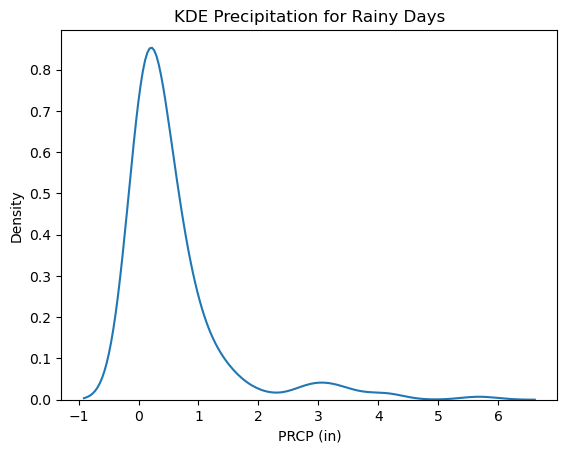

In [371]:
sns.kdeplot(weather.loc[weather['rain'] == 1, 'PRCP'])
plt.title("KDE Precipitation for Rainy Days")
plt.xlabel("PRCP (in)")
plt.show()

One method to improve the model is to introduce more information about the days itself, considering factors such as temperature, time of year, or humidity, to add some complexity in an attempt to capture more information about the variance of weather. 

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [372]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 

In [373]:
with open('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

print(len(data))
data[0]

# set(data[0])

1000


0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
            ...        
29                 SoHo
29                 SoHo
13    Greenwich Village
3               Chelsea
3               Chelsea
Name: nbhd, Length: 26026, dtype: object

In [374]:
states = set(data[0])

for i in range(1, len(data)):
    trip_i = set(data[i])
    states = states.union(trip_i)

states = list(states)
# states

In [375]:
# Compute Transition Counts

## Create a S X S transition matrix, and find the transition counts:

S = len(states)
# T = len(bach)
tr_counts = np.zeros( (S, S) )

## Compute transition counts:
for trip in data:
    seq = np.array(trip)
    for t in range(1,len(seq)):
        # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_to, index_from] += 1


In [376]:
t = 1
x_tm1

'Outside Manhattan'

In [377]:
states.index('Harlem')

26

In [378]:
print('Transiction Counts: \n', tr_counts)

Transiction Counts: 
 [[8.480000e+02 0.000000e+00 1.354000e+03 ... 1.960000e+02 3.180000e+02
  6.200000e+01]
 [0.000000e+00 2.000000e+00 2.000000e+00 ... 0.000000e+00 1.000000e+00
  0.000000e+00]
 [9.000000e+02 4.000000e+00 1.203902e+06 ... 2.985900e+04 2.775200e+04
  1.886200e+04]
 ...
 [1.520000e+02 0.000000e+00 2.267300e+04 ... 1.119300e+05 1.268800e+04
  1.503000e+03]
 [4.710000e+02 0.000000e+00 3.910800e+04 ... 9.970000e+03 1.019760e+05
  7.970000e+02]
 [5.300000e+01 0.000000e+00 2.594400e+04 ... 1.503000e+03 8.420000e+02
  7.192200e+04]]


In [379]:
# Sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print('State proportions: \n')

print(sums)

State proportions: 

[[1.038800e+04]
 [1.200000e+01]
 [2.363961e+06]
 [3.705660e+05]
 [8.393620e+05]
 [1.000000e+00]
 [1.058730e+05]
 [3.000000e+00]
 [8.010000e+03]
 [1.803491e+06]
 [5.505970e+05]
 [6.543970e+05]
 [3.603000e+03]
 [5.790800e+04]
 [1.431200e+04]
 [1.224325e+06]
 [3.851929e+06]
 [3.859100e+04]
 [2.292330e+05]
 [2.797713e+06]
 [8.886440e+05]
 [1.627050e+05]
 [1.978283e+06]
 [3.701250e+05]
 [5.077760e+05]
 [3.952740e+05]
 [2.171620e+05]
 [7.253000e+04]
 [5.017430e+05]
 [1.063770e+05]
 [1.112860e+05]
 [4.930000e+02]
 [8.740550e+05]
 [4.415950e+05]
 [1.743220e+05]
 [5.102620e+05]
 [4.086400e+05]
 [3.168490e+05]]


Transition Proportions:



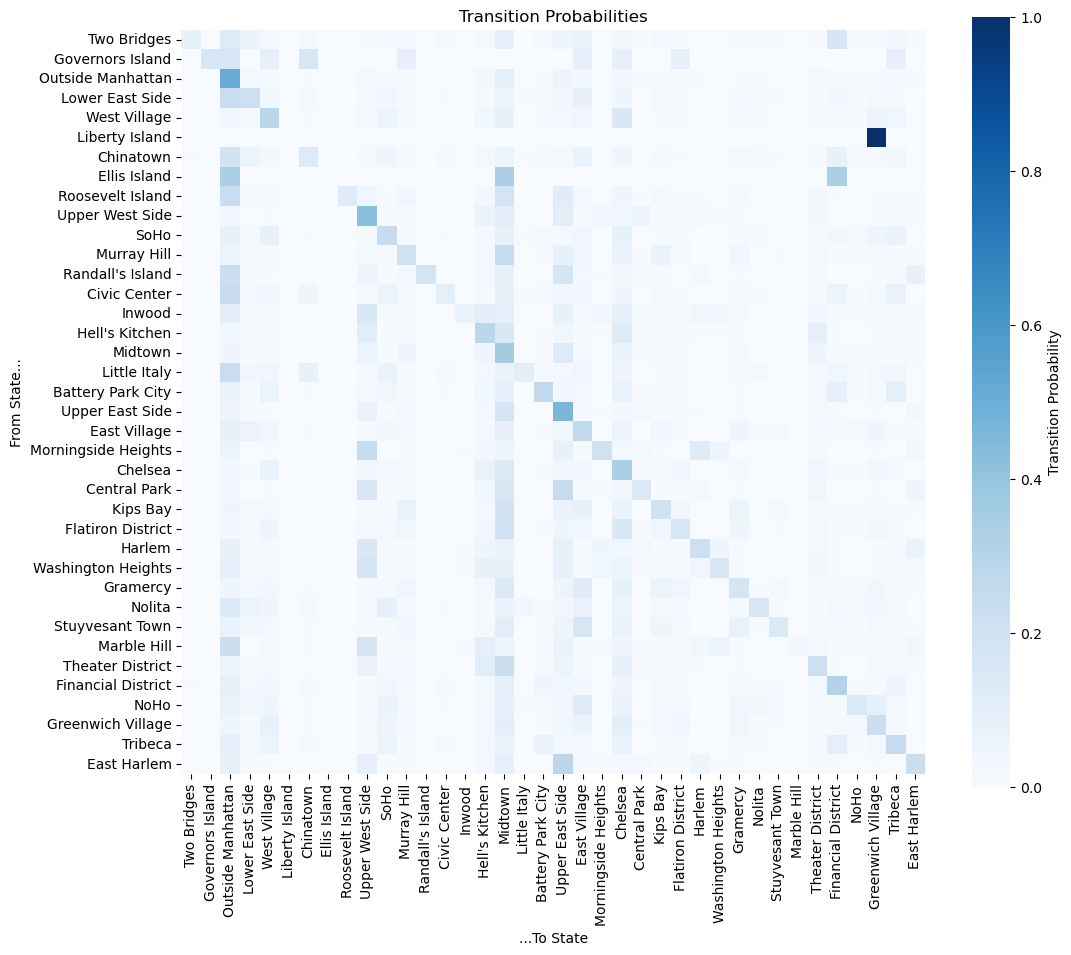

In [380]:
# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
# print(tr_df)

plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


The most common routes include trips that start and end in the same neighborhood, highlighted by the darker shades on the diagonals of the plot itself such as the Upper East Side to the Upper East Side. There are also a ton of routes that based on darker squares in the diagnola, such as for outside Manhattan and Midtown, that seem to be having a lot of trips that end up over there due to their proximity and overall relevance in Manhattan.

Taxi Cab Order

Taxicabs are most likely to be order 1 because it solely depends where you are going. For example, the neighborhood where you are likely indicates what you are like doing, like theoretically could predict to where you will end up like home, or the store. All of this information, about where the rider wants to go is all in the present. In this case, we don't care about where you came from, the taxi cab only cares about the destination itself. Knowing the location of the taxi 1, 2, or even 3 rides ago does not impact where the current passenger wants to go.As a result, its a dependency on the passenger, not the cab. This would not be the case for something like Uber, where the driver gets to choose the ride. Thus, the lack of regard for prior information means that the order cannot be two or more. 

- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [409]:
initial_state = "Hell's Kitchen"
state_index = states.index(initial_state)

density = np.zeros(len(states))
density[state_index] = 1


for steps in [2, 3, 5, 10]:
    
    forecast = density.copy()
    
    for k in range(steps):
        forecast = forecast @ tr_pr

    df = pd.DataFrame({'State': states, 'Probability': forecast})
    df = df.sort_values('Probability', ascending=False)
    
    print(f'After {steps} trips:')
    for i in range(5):
        state = df.iloc[i]['State']
        prob  = df.iloc[i]['Probability']
        print(f'{state}: {prob:.4f}')
    print()

After 2 trips:
Midtown: 0.1747
Hell's Kitchen: 0.1192
Chelsea: 0.1102
Upper West Side: 0.1090
Upper East Side: 0.0843

After 3 trips:
Midtown: 0.1741
Upper East Side: 0.1077
Chelsea: 0.0978
Upper West Side: 0.0971
Outside Manhattan: 0.0797

After 5 trips:
Midtown: 0.1697
Upper East Side: 0.1212
Outside Manhattan: 0.0957
Chelsea: 0.0881
Upper West Side: 0.0841

After 10 trips:
Midtown: 0.1678
Upper East Side: 0.1221
Outside Manhattan: 0.1026
Chelsea: 0.0861
Upper West Side: 0.0788



In [408]:
initial_state = np.random.choice(states) # Choose an initial state at random
state_index = states.index(initial_state) # Get the index of the initial state
print(f'Initial state: {initial_state}') 

density = np.zeros(len(states))
density[state_index] = 1

# n_sim = 1000

forecast = density.copy()

for k in range(50):
    forecast = forecast @ tr_pr

df = pd.DataFrame({'State': states, 'Probability': forecast})
df = df.sort_values('Probability', ascending=False)

print(df.head(10))


Initial state: Midtown
                State  Probability
16            Midtown     0.167754
19    Upper East Side     0.121839
2   Outside Manhattan     0.102944
22            Chelsea     0.086154
9     Upper West Side     0.078542
15     Hell's Kitchen     0.053319
20       East Village     0.038700
32   Theater District     0.038065
4        West Village     0.036554
11        Murray Hill     0.028499
